***Boot Camp Análisis de Datos- Integrador ***

**Andrea Fernanda Raigosa Paz**

**Predicción de Precios de Propiedades en UF en la Región Metropolitana de Chile**

El dataset utilizado se compone exclusivamente de información sobre casas en venta en la Región Metropolitana, el cual es tomado de https://www.kaggle.com

Para el desarrollo de este proyecto se aplicará técnicas de análisis exploratorio de datos para comprender la distribución y relaciones entre las variables. Posteriormente, se emplearán modelos de regresión para predecir los precios de las propiedades en UF. Se considerarán algoritmos como regresión lineal, regresión polinomial y técnicas de aprendizaje automático, como Random Forest.

Con esto se espera obtener modelos de predicción precisos que puedan proporcionar estimaciones confiables de los precios de las propiedades en UF en la Región Metropolitana. Estos modelos pueden ser utilizados por compradores y vendedores para tomar decisiones informadas en el mercado inmobiliario.

In [296]:
#Importamos las librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


**1. Importación y Exploración de Datos:**

Cargar y visualizar el conjunto de datos para entender su estructura y contenido.

In [291]:
#Como primer paso, importamos el archivo csv a la variable df

df = pd.read_csv("2023-07-18 Propiedades Web Scrape.csv")
df.head()

,Price_CLP,Price_UF,Price_USD,Comuna,Ubicacion,Dorms,Baths,Built Area,Total Area,Parking,id,Realtor
0,129884400,3600.0,158396.0,Lampa,AvenidaLaHacienda,3.0,2.0,68.0,221.0,1.0,7850612,Behouse
1,130000000,3603.0,158537.0,Buin,Villaseca,5.0,3.0,150.0,190.0,2.0,10081485,NaN
2,172998805,4795.0,210974.0,PuenteAlto,BarrioAustria,4.0,3.0,90.0,182.0,3.0,10257247,Bissac
3,135296250,3750.0,164995.0,Buin,ComercianteArmandoPérezCarrasco,3.0,2.0,85.0,175.0,1.0,20153043,Ambiento Propiedades
4,195000000,5405.0,237805.0,QuintaNormal,Hostos,3.0,3.0,130.0,402.0,1.0,16669338,Puntoinmobiliario.cl




*   **Significado de las variables**

**Price_CLP:**
Precio de la propiedad en pesos chilenos (CLP), la moneda nacional de Chile.

**Price_UF:**
Precio de la propiedad en Unidades de Fomento (UF). La UF es una unidad de cuenta utilizada en Chile que se ajusta diariamente según la inflación.

**Price_USD:**
Precio de la propiedad en dólares estadounidenses (USD), una moneda internacionalmente reconocida.

**Comuna:**
Comuna o municipio donde se encuentra la propiedad. Las comunas son subdivisiones administrativas dentro de las regiones de Chile.

**Ubicacion:**
Descripción específica de la ubicación de la propiedad, como dirección o zona dentro de la comuna.

**Dorms:**
Número de dormitorios en la propiedad.

**Baths:**
Número de baños en la propiedad.

**Built Area:**
Área construida de la propiedad en metros cuadrados. Es el espacio habitable dentro de la propiedad.

**Total Area:**
Área total del terreno en metros cuadrados, incluyendo espacios no construidos.

**Parking:**
Número de espacios de estacionamiento disponibles en la propiedad.

**id:**
Identificador único para cada propiedad en el dataset. Es usado para distinguir entre diferentes registros.

**Realtor:**
Nombre o identificación del agente inmobiliario o agencia que está vendiendo la propiedad.


**2. Preprocesamiento de Datos:**

Limpieza y preparación de los datos para el análisis.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   9291 non-null   int64  
 1   Price_UF    9291 non-null   float64
 2   Price_USD   9291 non-null   float64
 3   Comuna      9291 non-null   object 
 4   Ubicacion   9291 non-null   object 
 5   Dorms       9202 non-null   float64
 6   Baths       9138 non-null   float64
 7   Built Area  9013 non-null   float64
 8   Total Area  9057 non-null   float64
 9   Parking     6371 non-null   float64
 10  id          9291 non-null   int64  
 11  Realtor     8125 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 871.2+ KB


El DataFrame contiene 9291 entradas y 12 columnas.  Los tipos de datos incluyen int64 para 2 columnas, float64 para 7 columnas y object para 3 columnas. Hay valores faltantes en las columnas Dorms, Baths, Built Area, Total Area, Parking y Realtor


In [156]:
df.isna().sum()

Price_CLP        0
Price_UF         0
Price_USD        0
Comuna           0
Ubicacion        0
Dorms           89
Baths          153
Built Area     278
Total Area     234
Parking       2920
id               0
Realtor       1166
dtype: int64

Las columnas Price_CLP, Price_UF, Price_USD, Comuna, Ubicacion e id no tienen valores faltantes. Sin embargo, hay valores faltantes en Dorms (89), Baths (153), Built Area (278), Total Area (234), Parking (2920) y Realtor (1166).

In [157]:
# Eliminamos filas con valores nulos ya que no tenemos como recuperar estos.
df.dropna(axis=0, inplace=True)
df.isna().sum()

Price_CLP     0
Price_UF      0
Price_USD     0
Comuna        0
Ubicacion     0
Dorms         0
Baths         0
Built Area    0
Total Area    0
Parking       0
id            0
Realtor       0
dtype: int64

El resumen indica que no hay valores faltantes en ninguna de las columnas del dataset.

In [158]:
#Como medida de seguridad, eliminalos las filas duplicadas.

df = df.drop_duplicates()

In [159]:
# Al observar el df, sabemos que columnas no nos sirven, procedemos a dropearlas.
df.drop(['Price_CLP', 'Price_USD','Ubicacion','id', 'Realtor'], axis=1, inplace=True)

In [160]:
# Reseteamos el índice

df.reset_index(drop=True, inplace=True)
df.head()

,Price_UF,Comuna,Dorms,Baths,Built Area,Total Area,Parking
0,3600.0,Lampa,3.0,2.0,68.0,221.0,1.0
1,4795.0,PuenteAlto,4.0,3.0,90.0,182.0,3.0
2,3750.0,Buin,3.0,2.0,85.0,175.0,1.0
3,5405.0,QuintaNormal,3.0,3.0,130.0,402.0,1.0
4,4000.0,Peñaflor,3.0,3.0,84.0,180.0,3.0


In [161]:
# Nos aseguramos de que la misma comuna no esta repetida escrita de otra manera

unique_comunas = df['Comuna'].unique()
unique_comunas.sort()
unique_comunas

array(['Buin', 'CaleradeTango', 'Cerrillos', 'CerroNavia', 'Colina',
       'Conchalí', 'Curacaví', 'ElBosque', 'ElMonte', 'EstaciónCentral',
       'Huechuraba', 'Independencia', 'IsladeMaipo', 'LaCisterna',
       'LaFlorida', 'LaGranja', 'LaPintana', 'LaReina', 'Lampa',
       'LasCondes', 'LoBarnechea', 'LoEspejo', 'LoPrado', 'Macul',
       'Maipú', 'MaríaPinto', 'Melipilla', 'PadreHurtado', 'Paine',
       'PedroAguirreCerda', 'Peñaflor', 'Peñalolén', 'Pirque',
       'Providencia', 'Pudahuel', 'PuenteAlto', 'Quilicura',
       'QuintaNormal', 'Recoleta', 'Renca', 'SanBernardo', 'SanJoaquín',
       'SanJosédeMaipo', 'SanMiguel', 'SanRamón', 'Santiago', 'Talagante',
       'Tiltil', 'Vitacura', 'Ñuñoa'], dtype=object)

**3. Análisis Exploratorio de Datos (EDA):**

Identificación de patrones y relaciones entre variables.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5509 entries, 0 to 5508
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_UF    5509 non-null   float64
 1   Comuna      5509 non-null   object 
 2   Dorms       5509 non-null   float64
 3   Baths       5509 non-null   float64
 4   Built Area  5509 non-null   float64
 5   Total Area  5509 non-null   float64
 6   Parking     5509 non-null   float64
dtypes: float64(6), object(1)
memory usage: 301.4+ KB


In [163]:
correlacion = df.drop(columns=['Comuna']).corr()
correlacion

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
Price_UF,1.000000,0.444612,0.674913,-0.002415,0.064695,0.539803
Dorms,0.444612,1.000000,0.635809,0.020692,0.036234,0.327315
Baths,0.674913,0.635809,1.000000,0.003088,0.039452,0.436687
Built Area,-0.002415,0.020692,0.003088,1.000000,0.023991,0.015258
Total Area,0.064695,0.036234,0.039452,0.023991,1.000000,0.068989
Parking,0.539803,0.327315,0.436687,0.015258,0.068989,1.000000


**Precio en UF:**

Tiene una correlación moderada positiva con el número de baños (0.675) y con el estacionamiento (0.540).
Correlación más débil pero aún significativa con el número de dormitorios (0.445).
Casi no hay correlación con el área construida (-0.002).

**Dorms (Dormitorios):**

Tiene una correlación moderada positiva con el número de baños (0.636) y con el estacionamiento (0.327).
Correlación más débil con el precio en UF (0.445).

**Baths (Baños):**

Tiene una correlación moderada positiva con el precio en UF (0.675) y con el estacionamiento (0.437).
Correlación moderada con el número de dormitorios (0.636).

**Built Area (Área Construida):**

Casi no tiene correlación con ninguna de las otras variables, con valores muy cercanos a cero.

**Total Area (Área Total):**

Tiene una correlación débil pero positiva con el precio en UF (0.065) y con el estacionamiento (0.069).
Correlación muy débil con el resto de las variables.

**Parking (Estacionamiento):**

Tiene una correlación moderada positiva con el precio en UF (0.540) y con el número de baños (0.437).
Correlación más débil con el número de dormitorios (0.327).







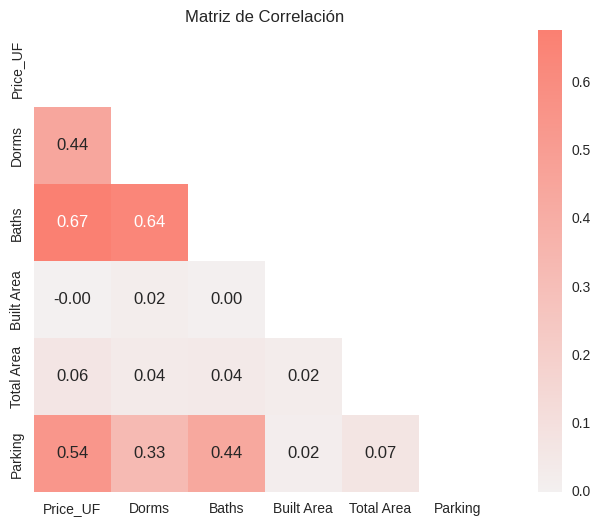

In [299]:
colores = sns.light_palette('salmon', as_cmap=True)
mask = np.triu(correlacion)

with sns.axes_style("white"):
    plt.figure(figsize=(11, 6))
    sns.heatmap(correlacion, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')
    plt.title('Matriz de Correlación')

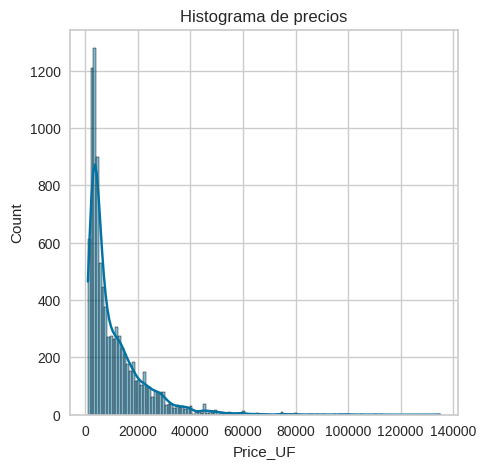

In [292]:
ax = sns.histplot(data=df, x='Price_UF', kde=True)
ax.figure.set_size_inches(5, 5)
ax.set_title('Histograma de precios')
ax.set_xlabel('Price_UF');

* Observamos una distribucion asimetrica a la derecha, para trabajar con regresion lineal necesitamos una distribución simetrica.

## Transformación de las variables

Estamos realizando una transformación logarítmica de las variables para obtener una distribución simétrica. La transformación realizada es:


$$log1p = log(1+x)$$

In [166]:
#Creamos el transformador a utilizar

transformador = FunctionTransformer(np.log1p, validate=True)
df_transformado = transformador.transform(df.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [167]:
# Ahora tenemos un df con los valores transfromados pero sin variables tipo 'Object',
# por lo cual tenemos que concatenar un nuevo df para incluirlas.

columnas_df_transformados = df.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df.select_dtypes(include=['object']), pd.DataFrame(df_transformado, columns=columnas_df_transformados)], axis=1)
df_transformado.head()

,Comuna,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
0,Lampa,8.188967,1.386294,1.098612,4.234107,5.402677,0.693147
1,PuenteAlto,8.475538,1.609438,1.386294,4.510860,5.209486,1.386294
2,Buin,8.229778,1.386294,1.098612,4.454347,5.170484,0.693147
3,QuintaNormal,8.595265,1.386294,1.386294,4.875197,5.998937,0.693147
4,Peñaflor,8.294300,1.386294,1.386294,4.442651,5.198497,1.386294


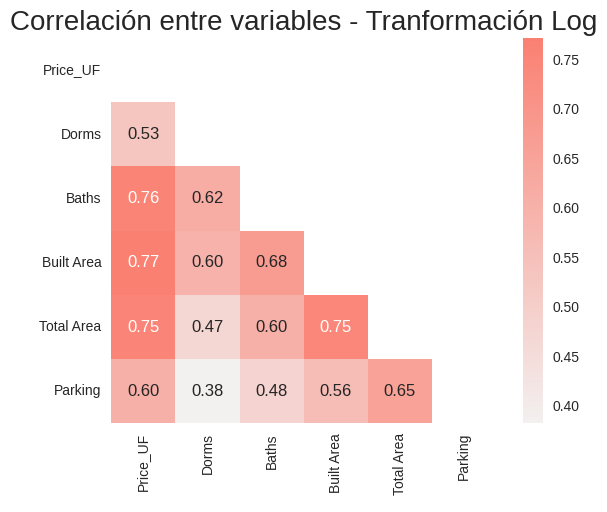

In [294]:
# Observamos los graficos despues de la transformación
correlacion_transformada = df_transformado.drop(columns=['Comuna']).corr()
mask = np.triu(correlacion_transformada)

with sns.axes_style("white"):
    plt.figure(figsize=(7, 5))
    ax = sns.heatmap(correlacion_transformada, cmap=colores, mask=mask, square=True, annot=True, fmt='.2f')
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

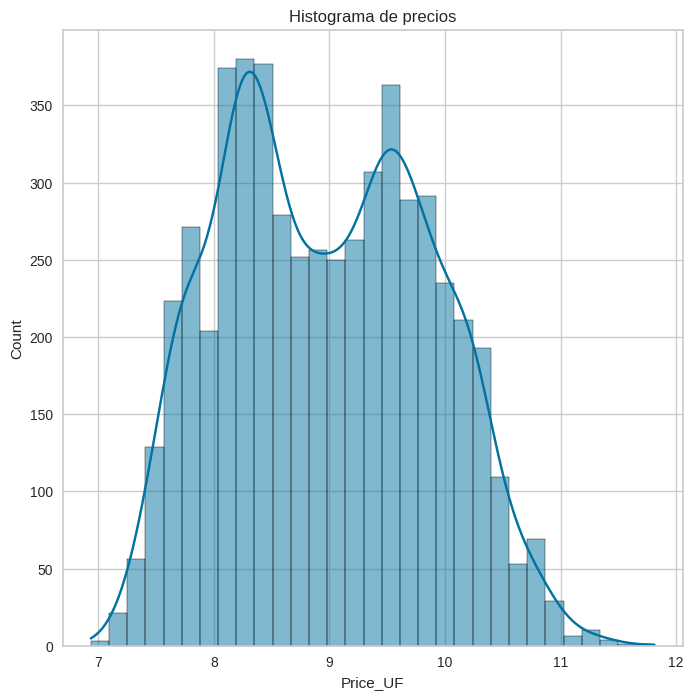

In [295]:
# Después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='Price_UF', kde=True)
ax.figure.set_size_inches(8, 8)
ax.set_title('Histograma de precios')
ax.set_xlabel('Price_UF');

## Dummies

#### Como sabemos, el modelo de regresión lineal trabaja mejor con datos numericos, por lo cual tendremos que encargarnos de las variables categoricas transformandolas a numericas.

In [173]:
variables_categoricas = df_transformado.select_dtypes(include=['object']).columns
variables_categoricas

Index(['Comuna'], dtype='object')

In [174]:
df_dummies = pd.get_dummies(df_transformado[variables_categoricas])
df_dummies.head()

,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,Comuna_Colina,Comuna_Conchalí,Comuna_Curacaví,Comuna_ElBosque,Comuna_ElMonte,Comuna_EstaciónCentral,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [175]:
# Ahora que tenemos las variables categoricas transformadas
# solo queda concatenarlas en un df final.

df_final = pd.concat([df_transformado.drop(variables_categoricas, axis=1), df_dummies], axis=1)
df_final.head()

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking,Comuna_Buin,Comuna_CaleradeTango,Comuna_Cerrillos,Comuna_CerroNavia,...,Comuna_SanBernardo,Comuna_SanJoaquín,Comuna_SanJosédeMaipo,Comuna_SanMiguel,Comuna_SanRamón,Comuna_Santiago,Comuna_Talagante,Comuna_Tiltil,Comuna_Vitacura,Comuna_Ñuñoa
0,8.188967,1.386294,1.098612,4.234107,5.402677,0.693147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,8.475538,1.609438,1.386294,4.510860,5.209486,1.386294,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8.229778,1.386294,1.098612,4.454347,5.170484,0.693147,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8.595265,1.386294,1.386294,4.875197,5.998937,0.693147,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.294300,1.386294,1.386294,4.442651,5.198497,1.386294,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**5. Modelado Predictivo:**

Aplicación de técnicas de regresión lineal para predecir el precio en UF.


### División de los datos

In [301]:
#Variables independientes
x = df_final.drop('Dorms', axis=1)

#Variables dependientes
y = df_final['Price_UF']

In [302]:
#división en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [309]:
# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(x_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, predicciones)
print('Error Cuadrático Medio:', mse)

Error Cuadrático Medio: 5.051954956242971e-29


In [303]:
#Iniciamos el modelo
lr = LinearRegression()

In [304]:
#Entrenamos el modelo
lr.fit(x_train, y_train)

LinearRegression()

In [305]:
#Prueba
x_test = x_test.dropna()
y_test = y_test.dropna()
prediccion_lr = lr.predict(x_test)


In [306]:
# Resultados de la predicción
prediccion_lr

array([10.79959599,  9.05963375,  8.99205998, ...,  9.90353755,
        8.51338595,  9.21044037])

In [307]:
# Realizamos la transformación inversa para obtener el valor original
np.expm1(10.62030029)

40956.91233374387

En este caso, el resultado de la predicción es 40956.91233374387. Esto significa que el modelo predice que el precio UF futuro será de 40.956,9123 UF.

## Metrica de desempeño

In [184]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.8903766255800535

* Averiguaremos qué tan “bien” se ajusta una línea de regresión muestral a los datos con el coeficiente de determinacion r2.
* Este encuentra entre 0 y 1, mientras mas cercano a 1 mejor. Desde 0,7 hacia arriba se considera aceptable.

## Arbol de Decisión para Regresión

In [188]:
#Inicializando el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [189]:
#Entrenamiento
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [190]:
#Prueba
prediccion_dtr = dtr.predict(x_test)

In [191]:
#Resultados de la predicción
prediccion_dtr

array([10.13498357,  8.78998384,  9.40031547, ...,  9.79420558,
        8.78998384,  9.40031547])

**Gráfico de error de predicción:** Un gráfico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


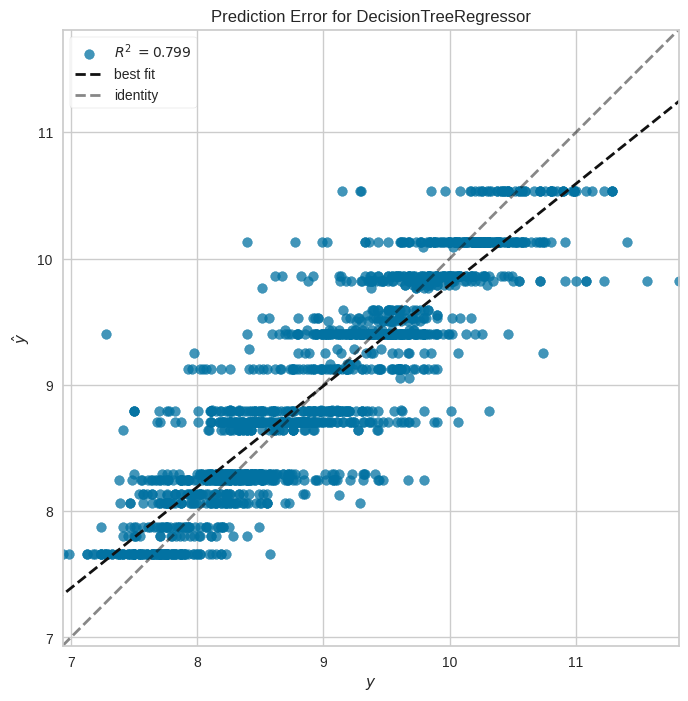

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [192]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(dtr)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

## Predicción con Random Forest

In [219]:
#Primero creamos la variable
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [222]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [223]:
prediccion_rf = rf.predict(x_test)

### Grafico de error de predicción

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


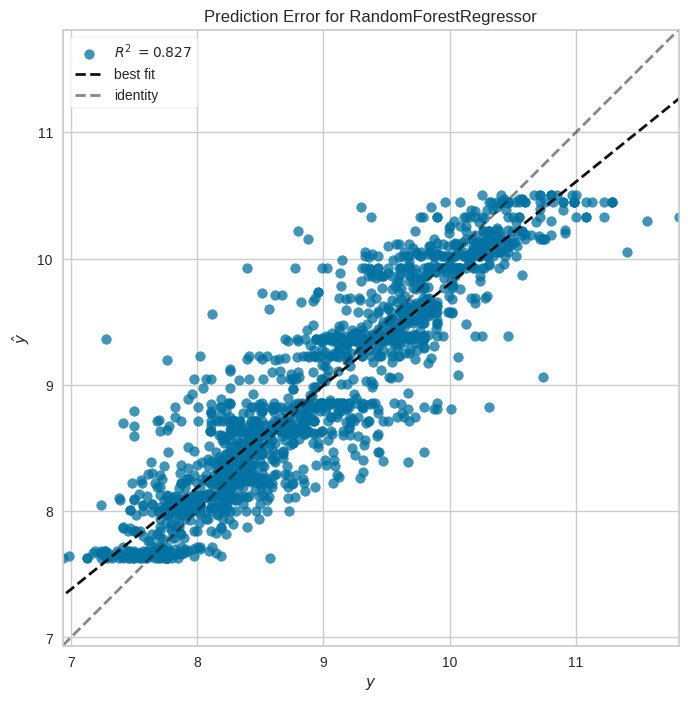

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [250]:
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(rf)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

**Coeficiente de Determinación (R²)**: El valor de R² es de 0.827, lo que indica que el modelo puede explicar aproximadamente el 82.7% de la variabilidad en los datos respecto a la variable objetivo. Este es un resultado bastante bueno, sugiriendo que el modelo es bastante efectivo en sus predicciones.

**Línea de Mejor Ajuste vs. Identidad:** Observando que la línea de mejor ajuste se aproxima bastante a la línea de identidad, podemos concluir que las predicciones del modelo son en general cercanas a los valores reales. Sin embargo, no es perfecta y hay cierta variabilidad y errores en las predicciones.

**Distribución de los Puntos:** Los puntos tienden a agruparse más cerca de la línea de mejor ajuste en el rango medio del gráfico, pero parecen dispersarse más a medida que los valores de y aumentan o disminuyen. Esto puede indicar que el modelo es más preciso en la predicción de valores medios que en los valores extremadamente altos o bajos.

## Optimización del Arbol de Decisión

### Cross Validation

In [251]:
from sklearn.model_selection import KFold

#definimos el numero de subconjuntos
cv = KFold(n_splits=5, shuffle=True)

In [261]:
from sklearn.model_selection import cross_val_score

accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = x_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.8


### Random Search Validation

In [262]:
from sklearn.model_selection import RandomizedSearchCV

#Selección de hiperparametros
param_random_dt = {'criterion': ['squared_error', 'absolute_error'],
                  'max_depth': [6, 8, 10, 12, 14, 16],
                   'min_samples_leaf': [6, 8, 10],
                   'min_samples_split': [8, 10, 12, 14, 16],
                   'max_features': [None, 'sqrt', 'log2'],
                  }

In [263]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [283]:
randomcv_dtr = random_cv_dt.fit(x_train, y_train)

In [284]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.783449,0.037437,0.003732,0.000203,12,8,None,14,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.811093,0.835425,0.806886,0.825192,0.840416,0.823802,0.013120,1
1,0.008259,0.000130,0.003440,0.000064,10,6,log2,12,squared_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.793660,0.734816,0.770654,0.786044,0.773932,0.771821,0.020270,4
2,0.210044,0.014035,0.004027,0.000309,14,10,sqrt,14,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.763698,0.724511,0.752459,0.765197,0.788941,0.758961,0.020925,5
3,0.010185,0.001855,0.003846,0.000604,16,8,sqrt,16,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.831633,0.793450,0.787470,0.789125,0.748369,0.790010,0.026403,3
4,0.017003,0.000944,0.003470,0.000538,12,10,None,6,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.808345,0.834616,0.798555,0.802487,0.826052,0.814011,0.013952,2


In [285]:
#la mejor combinación
randomcv_dtr.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 8,
 'max_features': None,
 'max_depth': 14,
 'criterion': 'absolute_error'}

In [286]:
#el mejor score
randomcv_dtr.best_score_

0.8238024121352658

### Random Search Test

In [287]:
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 16,
 min_samples_leaf = 8,
 max_features = None,
 max_depth = 10,
 criterion= 'squared_error')

In [288]:
dtr_optimizado.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=16)

In [289]:
prediccion_dtr_optimizado = dtr_optimizado.predict(x_test)

In [290]:
r2_score(y_test, prediccion_dtr_optimizado)

0.8357252109605356

**6. Conclusiones**

**Matriz de Correlación:**

Esta gráfica muestra la correlación entre las diferentes variables del conjunto de datos. Los valores más cercanos a 1 indican una fuerte correlación positiva, mientras que los valores más cercanos a -1 indican una fuerte correlación negativa. Los valores cercanos a 0 indican una correlación débil. Por ejemplo, el precio en UF tiene una correlación moderada positiva con el número de baños (0.675) y con el estacionamiento (0.540).

**Histograma de Precios:**

 Este gráfico muestra la distribución de los precios de las propiedades en UF. Se observa una distribución asimétrica a la derecha, lo que indica que la mayoría de las propiedades tienen precios bajos a medios, mientras que pocas propiedades tienen precios altos.

**Gráfico de Error de Predicción para el Árbol de Decisión y el Bosque Aleatorio:**


 Estos gráficos muestran los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados. La línea de mejor ajuste se aproxima bastante a la línea de identidad, lo que indica que las predicciones del modelo son en general cercanas a los valores reales. Sin embargo, hay cierta variabilidad y errores en las predicciones.

**Histograma de Precios después de la Transformación Logarítmica:**

Este gráfico muestra la distribución de los precios de las propiedades en UF después de aplicar una transformación logarítmica. La distribución parece más simétrica después de la transformación, lo que es beneficioso para los modelos de regresión lineal.

**Análisis de datos y modelado predictivo:**
**texto en negrita**
El código realiza un análisis exploratorio de datos para comprender la distribución y las relaciones entre las variables relacionadas con los precios de las propiedades en la Región Metropolitana de Chile.
Se utilizan técnicas de regresión, como la regresión lineal y la regresión polinomial, para predecir los precios futuros de las propiedades en UF (Unidades de Fomento).

**Transformación de datos:**

Se aplica una transformación logarítmica a las variables para obtener una distribución simétrica. Esto es importante para trabajar con regresión lineal.
Resultados de la predicción:
El modelo predice que el precio futuro en UF será de aproximadamente 40.956,9123 UF.
Esto significa que el modelo proporciona estimaciones confiables de los precios de las propiedades en la Región Metropolitana.

**Evaluación del modelo:**

El coeficiente de determinación (R2) del modelo es de 0,827.
Esto indica que el modelo puede explicar aproximadamente el 82,7% de la variabilidad en los datos con respecto a la variable objetivo.
En general, el modelo parece ser efectivo en sus predicciones.

**Optimización del modelo:**

Se realiza una validación cruzada y una búsqueda aleatoria para optimizar los hiperparámetros del modelo de regresión.


En resumen, el análisis sugiere que el modelo es confiable para predecir los precios de las propiedades en UF en la Región Metropolitana. Sin embargo, siempre es importante considerar otros factores y validar los resultados en situaciones del mundo real.

**BIBLIOGRAFIA**

Peláez, I. M. (s/f). Modelos de regresión: lineal simple y regresión logística. Revistaseden.org. Recuperado el 24 de mayo de 2024, de https://revistaseden.org/files/14-CAP%2014.pdf

Prediccion_valor_casas. (2023, noviembre 30). Kaggle.com; Kaggle. https://www.kaggle.com/code/delafuenteo/prediccion-valor-casas


La biblioteca estándar de Python. (s/f). Python documentation. Recuperado el 24 de mayo de 2024, de https://docs.python.org/es/3/library/index.html

(S/f). Org.mx. Recuperado el 24 de mayo de 2024, de https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1665-24362007000100004

